[[1.00000000e+00 1.12116479e-01 1.25701049e-02]
 [1.00000000e+00 9.24483072e-01 8.54668951e-01]
 [1.00000000e+00 3.02196935e-01 9.13229874e-02]
 [1.00000000e+00 9.79193116e-01 9.58819159e-01]
 [1.00000000e+00 7.72889667e-01 5.97358437e-01]
 [1.00000000e+00 8.05514914e-01 6.48854276e-01]
 [1.00000000e+00 2.71525430e-01 7.37260593e-02]
 [1.00000000e+00 2.94157485e-01 8.65286262e-02]
 [1.00000000e+00 4.93754446e-01 2.43793453e-01]
 [1.00000000e+00 3.31928554e-01 1.10176565e-01]
 [1.00000000e+00 8.03930622e-01 6.46304446e-01]
 [1.00000000e+00 5.19616970e-01 2.70001796e-01]
 [1.00000000e+00 2.32890650e-01 5.42380547e-02]
 [1.00000000e+00 5.51949739e-01 3.04648514e-01]
 [1.00000000e+00 4.09065320e-01 1.67334436e-01]
 [1.00000000e+00 9.00421401e-01 8.10758700e-01]
 [1.00000000e+00 2.10053807e-01 4.41226017e-02]
 [1.00000000e+00 6.11375728e-02 3.73780280e-03]
 [1.00000000e+00 6.47782710e-01 4.19622440e-01]
 [1.00000000e+00 3.17603834e-01 1.00872195e-01]
 [1.00000000e+00 1.17997591e-01 1.392343

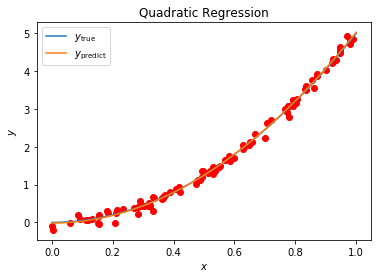

In [2]:
import numpy as np
import matplotlib.pyplot as plt
n = 100
xmax = 1
error = 0.1
x = np.random.rand(n,xmax)
y = 5*x*x+error*np.random.randn(n,xmax)
X = np.c_[np.ones((n,1)), x, x*x] # column wise array concatenation
print(X)
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print("y = " + str(beta[2,0]) + "*x^2 + " + str(beta[1,0]) + "*x + " + str(beta[0,0]))
nfit = 100
xplot = np.arange(nfit)*xmax / (nfit - 1) # nfit points, evenly distributed
#print(xplot)
#print(xplot**2)
Xplot = np.c_[np.ones((nfit,1)), xplot, xplot**2]
ypredict = Xplot.dot(beta)
ytrue = 5*xplot*xplot
plt.plot(x, y ,'ro')
plt.plot(xplot, ytrue, label="$y_{\mathrm{true}}$")
plt.plot(xplot, ypredict, label="$y_{\mathrm{predict}}$")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Quadratic Regression')
plt.legend()
plt.show()

ypredict = 5.038474919165684*x^2 + 0.010442035853729884*x + 0.0
ysklearn = 5.0384749191656715*x^2 + 0.010442035853720277*x + -0.017111410076428524


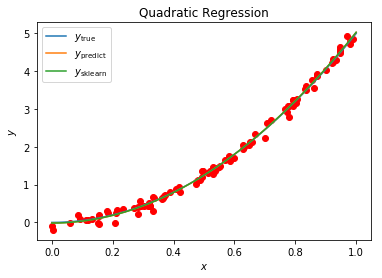

In [3]:
from sklearn.linear_model import LinearRegression

clf2 = LinearRegression()
clf2.fit(X, y)
ysklearn = clf2.predict(Xplot)

print("ypredict = " + str(clf2.coef_[0, 2]) + "*x^2 + " + str(clf2.coef_[0, 1]) + "*x + " + str(clf2.coef_[0, 0]))
print("ysklearn = " + str(beta[2,0]) + "*x^2 + " + str(beta[1,0]) + "*x + " + str(beta[0,0]))
# note that the indices are reversed in the scikit-learn approach compared to what we did before:
# the shape is (1, n) instead of (n, 1)

plt.plot(x, y ,'ro')
plt.plot(xplot, ytrue, label="$y_{\mathrm{true}}$")
plt.plot(xplot, ypredict, label="$y_{\mathrm{predict}}$")
plt.plot(xplot, ysklearn, label="$y_{\mathrm{sklearn}}$")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Quadratic Regression')
plt.legend()
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


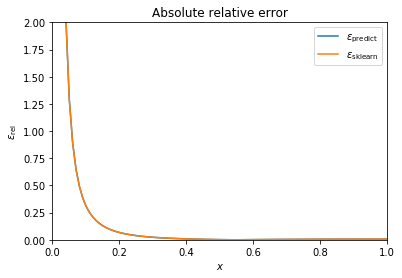

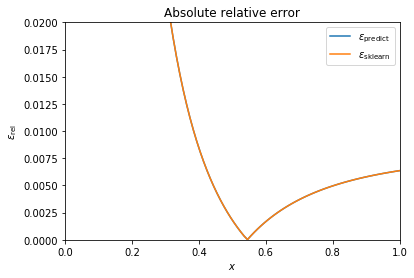

In [5]:
err_predict = abs(ypredict[:, 0] - ytrue)/abs(ytrue) # the predicted y's have shape (n, 1)
err_sklearn = abs(ysklearn[:, 0] - ytrue)/abs(ytrue)

plt.plot(xplot, err_predict, label="$\epsilon_{\mathrm{predict}}$")
plt.plot(xplot, err_sklearn, label="$\epsilon_{\mathrm{sklearn}}$")
plt.xlabel(r'$x$')
plt.ylabel(r'$\epsilon_{\mathrm{rel}}$')
plt.axis([0, xmax, 0, 2])
plt.title(r'Absolute relative error')
plt.legend()
plt.show()
plt.plot(xplot, abs(err_predict), label="$\epsilon_{\mathrm{predict}}$")
plt.plot(xplot, abs(err_sklearn), label="$\epsilon_{\mathrm{sklearn}}$")
plt.xlabel(r'$x$')
plt.ylabel(r'$\epsilon_{\mathrm{rel}}$')
plt.axis([0, xmax, 0, 0.02])
plt.title(r'Absolute relative error')
plt.legend()
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error

# Note that the y values are not sorted, but ypredict and ysklearn are
# (we used Xplot to find these, not X)
# Thus, done with plotting, let us instead make new predictions based on X

ypredict2 = X.dot(beta)
ysklearn2 = clf2.predict(X)

# Then we find the MSE:

print("Mean squared error (ypredict):", mean_squared_error(y, ypredict2))
print("Mean squared error (ysklearn):", mean_squared_error(y, ysklearn2))

Mean squared error (ypredict): 0.008528742126232971
Mean squared error (ysklearn): 0.008528742126232964


In [7]:
from sklearn.metrics import r2_score

print("R^2 score (ypredict):", r2_score(y, ypredict2))
print("R^2 score (ysklearn):", r2_score(y, ysklearn2))

R^2 score (ypredict): 0.9962970187709562
R^2 score (ysklearn): 0.9962970187709562


In [8]:
#EXERCISE 5

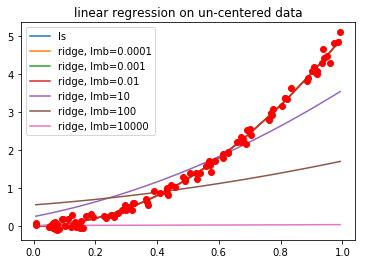

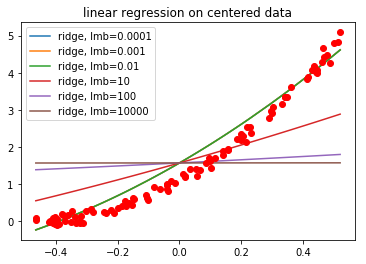

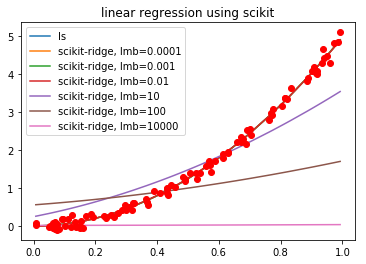

lambda = 0.0001
r2 for scikit: 0.995622
r2 for own code, not centered: 0.995622
r2 for own, centered: 0.959666

lambda = 0.001
r2 for scikit: 0.995622
r2 for own code, not centered: 0.995622
r2 for own, centered: 0.959666

lambda = 0.01
r2 for scikit: 0.995606
r2 for own code, not centered: 0.995606
r2 for own, centered: 0.959664

lambda = 10
r2 for scikit: 0.870409
r2 for own code, not centered: 0.870409
r2 for own, centered: 0.692359

lambda = 100
r2 for scikit: 0.269994
r2 for own code, not centered: 0.269994
r2 for own, centered: 0.15365

lambda = 10000
r2 for scikit: -0.996719
r2 for own code, not centered: -0.996719
r2 for own, centered: 0.00175067



In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

np.random.seed(4155)

n_samples = 100

x = np.random.rand(n_samples,1)
y = 5*x*x + 0.1*np.random.randn(n_samples,1)

# Centering  x and y.
x_ = x - np.mean(x)
y_ = y - np.mean(y) # beta_0 = mean(y)

X = np.c_[np.ones((n_samples,1)), x, x**2]
X_ = np.c_[x_, x_**2]


### 1.
lmb_values = [1e-4, 1e-3, 1e-2, 10, 1e2, 1e4]
num_values = len(lmb_values)

## Ridge-regression of centered and not centered data
beta_ridge = np.zeros((3,num_values))
beta_ridge_centered = np.zeros((3,num_values))

I3 = np.eye(3)
I2 = np.eye(2)

for i,lmb in enumerate(lmb_values):
    beta_ridge[:,i] = (np.linalg.inv( X.T @ X + lmb*I3) @ X.T @ y).flatten()
    beta_ridge_centered[1:,i] = (np.linalg.inv( X_.T @ X_ + lmb*I2) @ X_.T @ y_).flatten()

# sett beta_0 = np.mean(y)
beta_ridge_centered[0,:] = np.mean(y)

## OLS (ordinary least squares) solution 
beta_ls = np.linalg.inv( X.T @ X ) @ X.T @ y

## Evaluate the models
pred_ls = X @ beta_ls
pred_ridge =  X @ beta_ridge
pred_ridge_centered =  X_ @ beta_ridge_centered[1:] + beta_ridge_centered[0,:]

## Plot the results

# Sorting
sort_ind = np.argsort(x[:,0])

x_plot = x[sort_ind,0]
x_centered_plot = x_[sort_ind,0]

pred_ls_plot = pred_ls[sort_ind,0]
pred_ridge_plot = pred_ridge[sort_ind,:]
pred_ridge_centered_plot = pred_ridge_centered[sort_ind,:]

# Plott not centered
plt.plot(x_plot,pred_ls_plot,label='ls')

for i in range(num_values):
    plt.plot(x_plot,pred_ridge_plot[:,i],label='ridge, lmb=%g'%lmb_values[i])

plt.plot(x,y,'ro')

plt.title('linear regression on un-centered data')
plt.legend()

# Plott centered
plt.figure()

for i in range(num_values):
    plt.plot(x_centered_plot,pred_ridge_centered_plot[:,i],label='ridge, lmb=%g'%lmb_values[i])

plt.plot(x_,y,'ro')

plt.title('linear regression on centered data')
plt.legend()


# 2.

pred_ridge_scikit =  np.zeros((n_samples,num_values))
for i,lmb in enumerate(lmb_values):
    pred_ridge_scikit[:,i] = (Ridge(alpha=lmb,fit_intercept=False).fit(X,y).predict(X)).flatten() # fit_intercept=False fordi bias er allerede i X

plt.figure()

plt.plot(x_plot,pred_ls_plot,label='ls')

for i in range(num_values):
    plt.plot(x_plot,pred_ridge_scikit[sort_ind,i],label='scikit-ridge, lmb=%g'%lmb_values[i])

plt.plot(x,y,'ro')
plt.legend()
plt.title('linear regression using scikit')

plt.show()

### R2-score of the results
for i in range(num_values):
    print('lambda = %g'%lmb_values[i])
    print('r2 for scikit: %g'%r2_score(y,pred_ridge_scikit[:,i]))
    print('r2 for own code, not centered: %g'%r2_score(y,pred_ridge[:,i]))
    print('r2 for own, centered: %g\n'%r2_score(y,pred_ridge_centered[:,i]))

In [13]:
#EXERCISE 5